In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')


from utils import *
from optimizers import *

/home/solomon/.local/share/miniconda3/envs/nag/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
snr = np.inf
mu_noise = 0
batch_size = 512
delta = 0.2
seed = 69
c = 1e-2
eps = 1e-2
is_BCD = True
scheduler = True

ITR_LIM = 1000

snr = 50
approx = 1
mu_noise = 0
batch_size = 512
seed = 69
#####################################################

In [12]:
values_gd_approx = simulate(f, f, GD, approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=isDNN, ITR_LIM=ITR_LIM)

50
Initial Value: [6.9088554] Optimal Value: 0.0 #Params: 1000


100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 99.45it/s]


In [13]:
values_gd_approx_lc = simulate(f, f, GD, approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=isDNN, local_clock=True, ITR_LIM=ITR_LIM)

50
Initial Value: [6.9088554] Optimal Value: 0.0 #Params: 1000


100%|███████████████████████████████████████| 1000/1000 [00:12<00:00, 77.29it/s]


In [5]:
values_gd_approx_spall = simulate(f, f, GD, approx=approx, mu_noise=mu_noise, snr=snr, batch_size=batch_size, is_BCD=is_BCD, delta=delta, seed=seed, isDNN=isDNN, ITR_LIM=ITR_LIM, spall_grad=True, scheduler=False)

50
Initial Value: [6.9088554] Optimal Value: 0.0 #Params: 1000


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.85it/s]


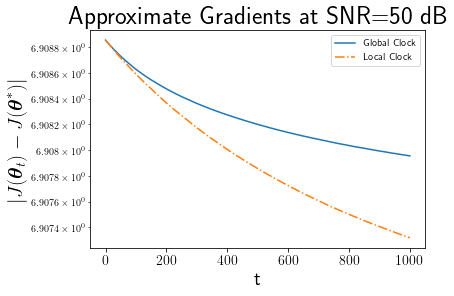

In [14]:
plt.title(r"Approximate Gradients at SNR={} dB".format(snr), fontsize=25)
plt.semilogy(values_gd_approx, label="Global Clock")
plt.semilogy(values_gd_approx_lc, '-.', label="Local Clock")
# plt.semilogy(values_gd_approx_spall, '--', label="Spall Gradient")
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$|J({\boldsymbol{\theta}_t}) - J({\boldsymbol{\theta}^*})|$', fontsize=20)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend()

In [7]:
phi = torch.Tensor(np.ones((1, N))).to(device)

In [8]:
g1 = spall_gradient(f, phi, c=1e-12, snr=np.inf, mu=0, perturb_snr=100, perturb_mu=0, device=device)

In [9]:
g1[1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
v = 0.1*torch.Tensor(2*np.random.binomial(1, p=0.5, size=phi.shape) - 1).to(device)

In [ ]:
v

In [ ]:
f(phi + v)

In [ ]:
f(phi + v)/(v)

In [ ]:
(f(phi + v) - f(phi))/(v)

In [ ]:
f(phi)

In [ ]:
df(phi)